# Topic - Analysis on marijuana but words related to medicinal marijuana

# Student Name - Nitish Agrawal

# Student Number - S3881575

In [2]:
#Library which is needed throughout the assignment
import snscrape.modules.twitter as sntwitter
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px
import ast
import string
import numpy as np
import math
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import pyLDAvis.sklearn
from  matplotlib.pyplot import figure, text
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
# ignoring all the warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


# downloading stopwords corpuses
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
nltk.download('omw-1.4')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nitis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nitis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nitis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nitis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\nitis\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nitis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is alr

The `wordList2` consist of the words that we are interested in to analyze. 
They include medicinal cannabis, medicinal marijuana, THC, CBD, Sinsemilla etc which are different type of marijuana drugs.

In [1]:
wordlist2 = ['medicinal cannabis','medicinal marijuana','endocannabinoids','Cannabigerols','Cannabichromenes','Cannabinol','Cannabinodiol','CB1/CB2', 'sinsemilla','THC','CBD']

In [9]:
tweets = []
df=[]

In [10]:
#Collecting the tweets which are specific to USA, specific duration, no of followers of users, mentioned users, no of reply count, no of like count.
count = 0
for word in wordlist2 :
    dates = ' lang:en until:2022-10-15 since:2022-06-15 -filter:replies  min_faves:2'
    query = str(word) + dates
    print(query)
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
        if len(tweets) > 10000:
            break
        else:
            if tweet.place != None and tweet.place.countryCode == 'US' and tweet.user.followersCount > 1 and tweet.user.friendsCount > 1:
                count+=1
                print(count,end = ' ')
                tweets.append([tweet.date,tweet.user.username,tweet.content,tweet.hashtags,tweet.user.location,tweet.mentionedUsers,word,tweet.replyCount,tweet.likeCount,tweet.retweetCount,tweet.user.followersCount])
tweetDf = pd.DataFrame(tweets,columns = ['Date','User','Tweet','Hashtags','Location','Mentioned User','Key Word','Reply Count','like Count','Retwet Count','Followers Count'])

medicinal cannabis lang:en until:2022-10-15 since:2022-06-15 -filter:replies  min_faves:2
1 2 3 4 5 6 7 8 9 10 11 medicinal marijuana lang:en until:2022-10-15 since:2022-06-15 -filter:replies  min_faves:2
12 13 14 15 16 17 18 endocannabinoids lang:en until:2022-10-15 since:2022-06-15 -filter:replies  min_faves:2
19 20 21 Cannabigerols lang:en until:2022-10-15 since:2022-06-15 -filter:replies  min_faves:2
Cannabichromenes lang:en until:2022-10-15 since:2022-06-15 -filter:replies  min_faves:2
Cannabinol lang:en until:2022-10-15 since:2022-06-15 -filter:replies  min_faves:2
22 Cannabinodiol lang:en until:2022-10-15 since:2022-06-15 -filter:replies  min_faves:2
CB1/CB2 lang:en until:2022-10-15 since:2022-06-15 -filter:replies  min_faves:2
23 sinsemilla lang:en until:2022-10-15 since:2022-06-15 -filter:replies  min_faves:2
24 THC lang:en until:2022-10-15 since:2022-06-15 -filter:replies  min_faves:2
25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55

In [4]:
#csv_data = df.to_csv('data12345.csv',index=False)
tweetDf = pd.read_csv("data12345.csv")

In [5]:
tweetDf.head()

Date            User  \
0  2022-09-25 16:04:11+00:00  AquaBlueLounge   
1  2022-09-15 00:24:16+00:00      But_A_Cake   
2  2022-09-11 12:21:26+00:00      But_A_Cake   
3  2022-08-27 15:00:20+00:00   OhioGreenTeam   
4  2022-08-21 17:20:49+00:00        UCSDAnes   

                                               Tweet  \
0  Yes, Free Griner as no one should be in prison...   
1  I found my medicinal cannabis professional wit...   
2  I’d love to talk to a pediatrician that has ex...   
3  #Cannabis has a laundry list of #Medicinal use...   
4  Dr. Tim Furnish present a thorough overview of...   

                                            Hashtags  \
0                                                NaN   
1                                     ['bzcannabis']   
2  ['Pediatrician', 'Pediatrics', 'cannabisindust...   
3  ['Cannabis', 'Medicinal', 'Overdose', 'Opioids...   
4                               ['UCSDAnesUpdate22']   

                       Location  \
0                  Portland, OR   
1               Jersey City, NJ   
2               Jersey City, NJ   
3  Throughout Ohio via Telemed!   
4                 San Diego, CA   

                                      Mentioned User            Key Word  \
0                                                NaN  medicinal cannabis   
1  [User(username='BzCannabis', id=11008095493831...  medicinal cannabis   
2                                                NaN  medicinal cannabis   
3                                                NaN  medicinal cannabis   
4                                                NaN  medicinal cannabis   

   Reply Count  like Count  Retwet Count  Followers Count  
0            0           3             0              579  
1            0          10             0              467  
2            0           2             0              467  
3            0           7             1            27487  
4            0           5             2              214

# Data Preprocessing

In [6]:
# Delete duplicate rows based on specific columns 
tweetDf = tweetDf.drop_duplicates(subset=["Tweet"], keep=False)

In [7]:
#Converting the tweets, hashtags, mentioned user into lower cases, and replacing nan values to Washington DC.
#Converting those values to lower for removing duplicates in latter stages 
tweetDf['Tweet'] = tweetDf['Tweet'].str.lower()
tweetDf['Hashtags'] = tweetDf['Hashtags'].str.lower()
tweetDf['Hashtags'] = tweetDf['Hashtags'].replace(np.nan,'no hashtags')
tweetDf['Mentioned User'] = tweetDf['Mentioned User'].replace(np.nan,'no mentions')
tweetDf['Location'] = tweetDf['Location'].replace(np.nan,'Washington, DC')

In [8]:
#Resetting the index as the dataframe might have multinidexes
tweetDf = tweetDf.reset_index(drop=True)

In [9]:
tweetDf.shape

(831, 11)

In [10]:
#function to extract the hashtags
def hashtags(text):    
    hashtag = []  
    for i in text:
        if i != 'no hashtags':
        
            for j in ast.literal_eval(i):
                hashtag.append(j)
    return hashtag

In [11]:
hashtag = hashtags(tweetDf['Hashtags'])

In [12]:
hashtag = {x:hashtag.count(x) for x in hashtag}

# Plotting top 10 most frequent hashtags

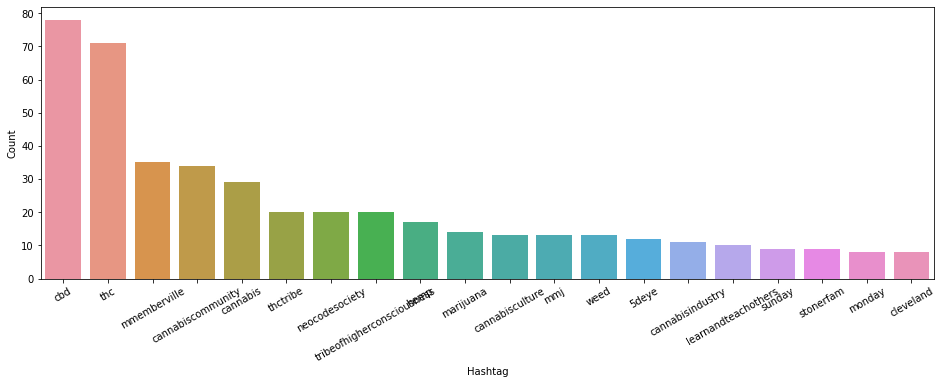

In [13]:
a = nltk.FreqDist(hashtag)
n_largest_hashtags = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})    
n_largest_hashtags = n_largest_hashtags.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=n_largest_hashtags, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(rotation=30)
plt.show()

In [14]:
#function to extract mentions from text
def mentions(x):
    # @x : text parameter to the function
    mentions = []
    for i in x:
        # re for finding mentions
        ht = re.findall(r'@[\w]*', i)
        # storing hashtags in list
        mentions.append(ht)
    # returns mentions from the function
    return mentions

In [15]:
#storing the mentions in list
mentions = mentions(tweetDf['Tweet'])

#getting sum of the mentions
mentions = sum(mentions,[])

# Plotting top 10 most frequent hashtags 

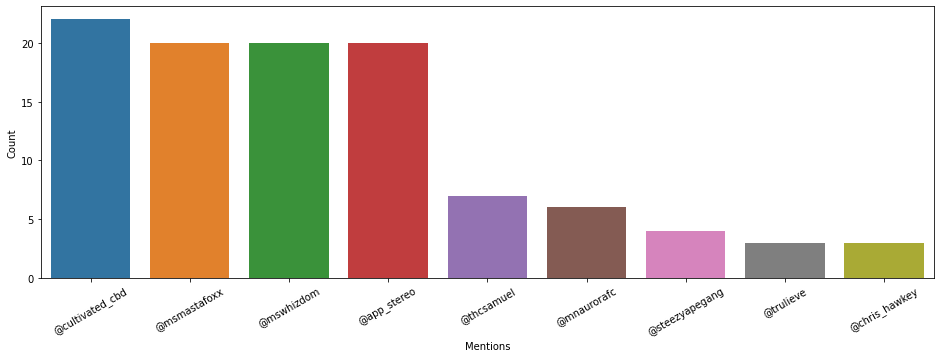

In [16]:
a = nltk.FreqDist(mentions)
n_largest_mentions = pd.DataFrame({'Mentions': list(a.keys()),
                  'Count': list(a.values())})   
n_largest_mentions = n_largest_mentions.nlargest(columns="Count", n = 10)
n_largest_mentions.drop(n_largest_mentions.index[n_largest_mentions['Mentions'] == '@'], inplace=True)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=n_largest_mentions, x= "Mentions", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(rotation=30)
plt.show()

In [17]:
locationDf = tweetDf['Location']
tweetDf.shape

(831, 11)

In [18]:
location = locationDf.tolist()
usadata = pd.read_csv('uscities.csv')
usadata = usadata[['city','state_id']]

In [19]:
city = usadata['city'].tolist()
state_id = usadata['state_id'].tolist()
usdata = list(zip(city,state_id))

In [20]:
tweetLocation = []
tweetLocationNotFound=[]
for i in location:
    
    x = i.split(", ")
    
    if len(x) >1:
        for a,b in usdata:
            if x[0].lower() == a.lower():
                tweetLocation.append(b)
                break
            elif x[1].lower == b.lower():                
                tweetLocation.append(b)
                break
    elif len(x) == 1:
        for a,b in usdata:
            if a in i:
                tweetLocation.append(b)
                break
            elif b in i:
                tweetLocation.append(b)
                break
    else:
        tweetLocationNotFound.append(i)
        break        

In [21]:
locationdata = pd.DataFrame(tweetLocation,columns = ['Location'])

In [22]:
locationdata= locationdata.assign(Count=1).groupby('Location')['Count'].count().reset_index()

In [23]:
locationdata = locationdata.sort_values(by = 'Count',ascending= True)

In [24]:
fig = px.choropleth(locationdata, 
                    locations = 'Location',
                    locationmode = 'USA-states',
                    scope ='usa',
                    color = 'Count',
                   range_color = [10,90],
                   color_continuous_scale = 'reds',
                   title = 'US marijuna tweets related data for last months')

fig.show()

In [25]:
loc = locationdata['Location'].tolist()
cnt = locationdata['Count'].tolist()
locations = list(zip(loc,cnt))

In [26]:
state = pd.read_csv('uscities.csv')
state = state[['state_id','state_name']]
stateId = state['state_id'].tolist()
stateName = state['state_name'].tolist()

statedata = list(zip(stateId,stateName))

In [27]:
data = []
for i,j in locations:
    
    for a,b in statedata:
        
        if i.lower() == a.lower():
            data.append((b,j))
            break
data =pd.DataFrame(data, columns = ['Location','Count'])

Barplot for location 

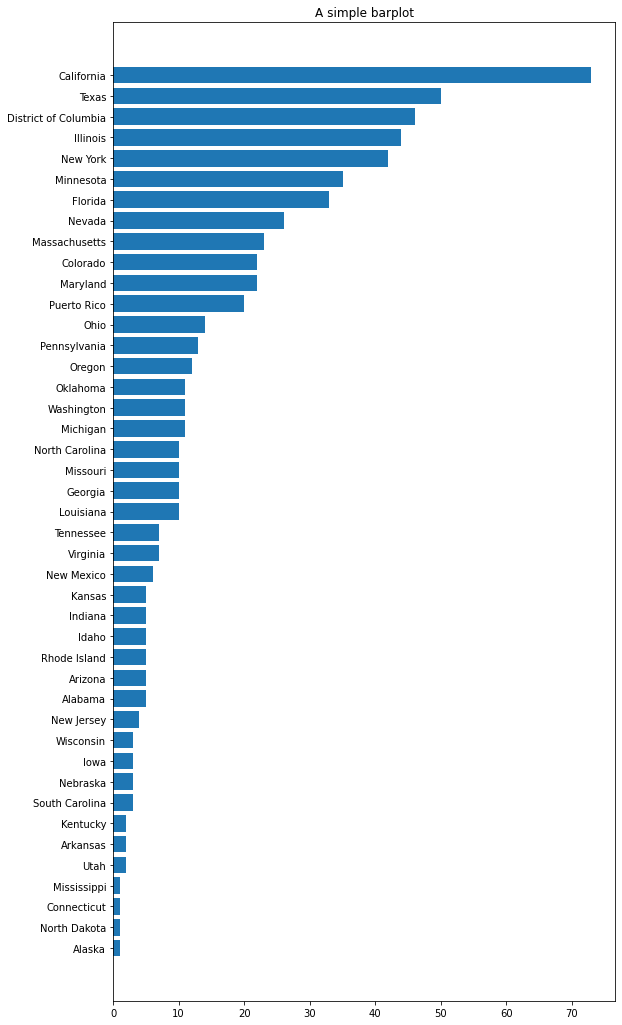

In [28]:
height = locationdata['Count']
bars = locationdata['Location']
y_pos = np.arange(len(bars))

fig, ax = plt.subplots()

# Fig size
fig.set_size_inches(9,18)

# Create horizontal bars
ax.barh(y=data.Location, width=data.Count);

# Add title
ax.set_title('A simple barplot');

In [29]:
clean_tweets = []   
for index, row in tweetDf.iterrows():
    #filtering the words that contains link
    words_without_links = [word for word in row.Tweet.split() if 'http' not in word]
    clean_tweets.append(' '.join(words_without_links))

In [30]:
tweetDf['Tweet'] = clean_tweets

In [31]:
#Removing the patterns from tweets
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text

tweetDf['Tweet'] = np.vectorize(remove_pattern)(tweetDf['Tweet'], r"RT\s*:")


In [32]:
#creating the function to clean th text of tweets

def cleantextdata(text):
    
    # funtion to clean emojies
    def deEmojify(text):
        regrex_pattern = re.compile(pattern = "["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        u"\U0001f926-\U0001f937"
                        u"\U0001F1F2"
                        u"\U0001F1F4"
                        u"\U0001F620"
                        u"\u200d"
                        u"\u2640-\u2642"
                        u"\u2600-\u2B55"
                        u"\u23cf"
                        u"\u23e9"
                        u"\u231a"
                        u"\ufe0f"  # dingbats
                        u"\u3030"
                        u"\U00002500-\U00002BEF"  # Chinese char
                        u"\U00010000-\U0010ffff"
                               "]+", flags = re.UNICODE)
        return regrex_pattern.sub(r'',text)
    
    #removes all the mentions in the tweets
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    
    #removes  and replaces with '', if there are any characters with '@' character
    text = re.sub(r'@+','',text)
    
    #removes  and replaces with '', if there are any characters with '_' character
    text = re.sub(r'_*','',text)
    
    #removes  and replaces with '', if there are any characters with '.' character
    text = re.sub(r'/.+','',text)
    
    #removes all the hash tag in the tweet
    text = re.sub(r'#[A-Za-z0-9]+','',text)
    
    #removes next line character and replaces with ''
    text = re.sub(r'\n+',' ',text)
    
    #removes all the emojies from text replaces it with ''
    text = deEmojify(text)
    
    #removes all the pucntuations in the text replaces it with ''
    text = text.translate(str.maketrans('','',string.punctuation))
    
    #removes and replaces the extra space in the text with ''
    text = re.sub(r'^\s+|\s+$|\s+(?=\s)/g','',text)
    
    #removes and replaces the extra space in the text with ''
    text = re.sub(r'\s+',' ',text)
    
    #removes the space between words like ca nt, have nt and joins the words
    if " nt" in text:

        text = re.sub(r'\s+nt',"nt",text)
    
    return text

In [33]:
tweetDf['TweetCleaned'] = tweetDf['Tweet'].apply(cleantextdata)

Filtering the stopwords from tweets and putting it in TweetCleaned

In [34]:
stopwords_set = set(stopwords)
cleaned_tweets = []


for index, row in tweetDf.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.TweetCleaned.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
tweetDf['TweetCleaned'] = cleaned_tweets

Tokenization

In [35]:
tokenized_tweet = tweetDf['TweetCleaned'].apply(lambda x: x.split())

In [36]:
word_lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head()

    
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)


tweetDf['TweetCleaned'] = tokenized_tweet

In [37]:
#create a funtion to get subjectivity  and polarity

#if subjectivity is towards 1 that means its directed towards the topic
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#gives us the polarity of the tweet so that we can decide is it positive or negative tweet
def polarity(text):
    
    return TextBlob(text).sentiment.polarity

tweetDf['Subjectivity'] = tweetDf['TweetCleaned'].apply(subjectivity)
tweetDf['Polarity'] = tweetDf['TweetCleaned'].apply(polarity)

In [38]:
#creating a function to calculate and show the that tweet is negative or positive with the help of polarity

def analysis(score):
    
    #if polarity score is < 0 its a negative tweet
    if score < 0:
        return "Negative"
    #if polarity score is = 0 its a neutral tweet
    elif score == 0:
        return "Neutral"
    #if polarity score is > 0 its a Positive tweet
    else:
        return "Positive"

In [39]:
tweetDf['analysis'] = tweetDf['Polarity'].apply(analysis)

In [40]:
tweetDf['analysis'].value_counts()

Positive    433
Neutral     269
Negative    129
Name: analysis, dtype: int64

In [41]:
tweetDf['Date'] = pd.to_datetime(tweetDf['Date'], format= '%Y-%m-%d %H:%M:%S')

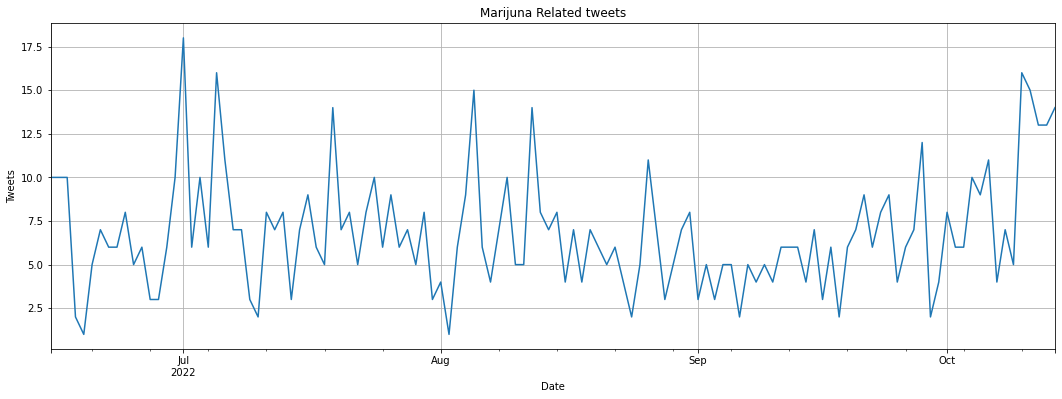

<Figure size 432x288 with 0 Axes>

In [42]:
#Plotting the recent tweets with freq of 30 mins

#Getting the data from tweetDf, and grouping them at freq of 30 mins 
tweets = tweetDf.groupby(pd.Grouper(key='Date', freq='D', convention='start')).size()

#Plot size 
tweets.plot(figsize=(18,6))

#X axis label
plt.xlabel('Date')

#y axis label
plt.ylabel('Tweets')

#Title of the plot
plt.title('Marijuna Related tweets')
plt.grid(True)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("Marijuna_related_tweets_done_everyday.jpg", dpi=100)

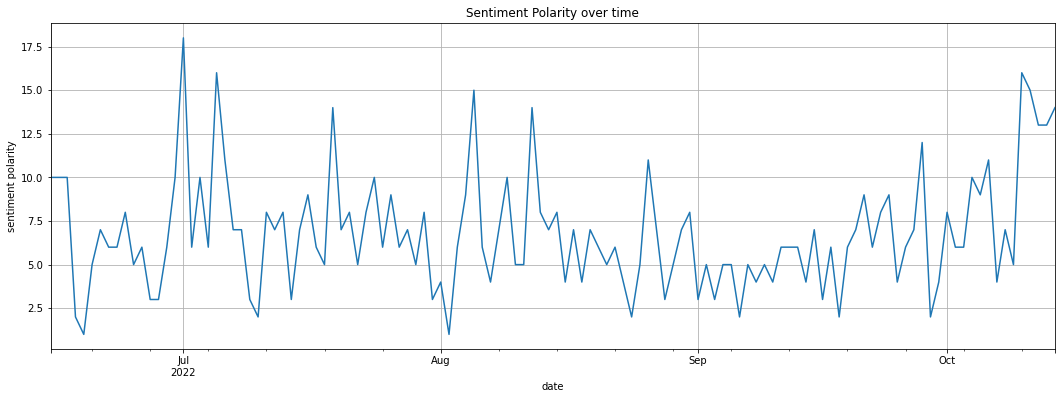

<Figure size 432x288 with 0 Axes>

In [43]:
#Plotting the recent tweet within freq of 30 mins

#Getting the data from the tweetDf and grouping them with freq of 30 mins 
tweets = tweetDf.groupby(pd.Grouper(key='Date', freq='D', convention='start')).size()

#Plot size 
tweets.plot(figsize=(18,6))

#X axis label
plt.xlabel('date')

#y axis label
plt.ylabel('sentiment polarity')

#Title of the plot
plt.title('Sentiment Polarity over time')
plt.grid(True)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("Marijuna_related_tweets_done_everyday.jpg", dpi=100)

In [44]:
tweetDf.head()

Date             User  \
0 2022-09-25 16:04:11+00:00   AquaBlueLounge   
1 2022-09-15 00:24:16+00:00       But_A_Cake   
2 2022-09-11 12:21:26+00:00       But_A_Cake   
3 2022-08-21 17:20:49+00:00         UCSDAnes   
4 2022-08-05 02:10:08+00:00  MaryJaneIsMyGod   

                                               Tweet  \
0  yes, free griner as no one should be in prison...   
1  i found my medicinal cannabis professional wit...   
2  i’d love to talk to a pediatrician that has ex...   
3  dr. tim furnish present a thorough overview of...   
4                  “all cannabis usage is medicinal”   

                                            Hashtags         Location  \
0                                        no hashtags     Portland, OR   
1                                     ['bzcannabis']  Jersey City, NJ   
2  ['pediatrician', 'pediatrics', 'cannabisindust...  Jersey City, NJ   
3                               ['ucsdanesupdate22']    San Diego, CA   
4                                        no hashtags       Oxford, PA   

                                      Mentioned User            Key Word  \
0                                        no mentions  medicinal cannabis   
1  [User(username='BzCannabis', id=11008095493831...  medicinal cannabis   
2                                        no mentions  medicinal cannabis   
3                                        no mentions  medicinal cannabis   
4                                        no mentions  medicinal cannabis   

   Reply Count  like Count  Retwet Count  Followers Count  \
0            0           3             0              579   
1            0          10             0              467   
2            0           2             0              467   
3            0           5             2              214   
4            0           2             0               87   

                                        TweetCleaned  Subjectivity  Polarity  \
0  yes free griner one prison medicinal cannabis ...       0.40000    0.0500   
1  found medicinal cannabis professional understa...       0.10000    0.1000   
2  i’d love talk pediatrician experience medicina...       0.60000    0.5000   
3  dr tim furnish present thorough overview past ...       0.09375   -0.0625   
4                     “all cannabis usage medicinal”       0.00000    0.0000   

   analysis  
0  Positive  
1  Positive  
2  Positive  
3  Negative  
4   Neutral

# Topic Analysis

In [45]:
#LDA parameters

#No of topics to discover (default = 10)
topicNum = 5

#Maximum number of words to display per topic (default = 10)
#Answer to Exercise 1 (change from 10 to 15)
wordNumToDisplay = 15

#This is the number of features/words to used to describe our documents
featureNum = 1500

In [46]:
#Count Vectorizer
tfVectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum, stop_words='english')
tf = tfVectorizer.fit_transform(tweetDf['TweetCleaned'])

#Extract the names of the features 
tfFeatureNames = tfVectorizer.get_feature_names()

#Run LDA  Model
ldaModel = LatentDirichletAllocation(n_components =topicNum, max_iter=10, learning_method='online').fit(tf)

In [47]:
def display_topics(model, featureNames, numTopWords):
    """
    Prints out the most associated words for each feature.
    @param model: lda model.
    @param featureNames: list of strings, representing the list of features/words.
    @param numTopWords: number of words to print per topic.
    """
    # print out the topic distributions
    for topicId, lTopicDist in enumerate(model.components_):
        print("Topic %d:" % (topicId))
        print(" ".join([featureNames[i] for i in lTopicDist.argsort()[:-numTopWords - 1:-1]]))

In [48]:
display_topics(ldaModel, tfFeatureNames, wordNumToDisplay)

Topic 0:
thc cbd amp good smoke game coffee giving week high like age old tonight hope
Topic 1:
cbd free dog firework steel treat pt code pain weekend happy pet seltzer cat promo
Topic 2:
cbd thc amp day like today product great cannabis sleep weed night got time help
Topic 3:
thc amp cbd infused stereo miss live dont mark calendar available let app love use
Topic 4:
cbd thc new ve im gummies oil drink help gave store win going right anxiety


In [49]:
panel = pyLDAvis.sklearn.prepare(ldaModel, tf, tfVectorizer, mds='tsne')
pyLDAvis.display(panel)

# Generating Wordcloud

In [50]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()


tweetDf.head()

Date             User  \
0 2022-09-25 16:04:11+00:00   AquaBlueLounge   
1 2022-09-15 00:24:16+00:00       But_A_Cake   
2 2022-09-11 12:21:26+00:00       But_A_Cake   
3 2022-08-21 17:20:49+00:00         UCSDAnes   
4 2022-08-05 02:10:08+00:00  MaryJaneIsMyGod   

                                               Tweet  \
0  yes, free griner as no one should be in prison...   
1  i found my medicinal cannabis professional wit...   
2  i’d love to talk to a pediatrician that has ex...   
3  dr. tim furnish present a thorough overview of...   
4                  “all cannabis usage is medicinal”   

                                            Hashtags         Location  \
0                                        no hashtags     Portland, OR   
1                                     ['bzcannabis']  Jersey City, NJ   
2  ['pediatrician', 'pediatrics', 'cannabisindust...  Jersey City, NJ   
3                               ['ucsdanesupdate22']    San Diego, CA   
4                                        no hashtags       Oxford, PA   

                                      Mentioned User            Key Word  \
0                                        no mentions  medicinal cannabis   
1  [User(username='BzCannabis', id=11008095493831...  medicinal cannabis   
2                                        no mentions  medicinal cannabis   
3                                        no mentions  medicinal cannabis   
4                                        no mentions  medicinal cannabis   

   Reply Count  like Count  Retwet Count  Followers Count  \
0            0           3             0              579   
1            0          10             0              467   
2            0           2             0              467   
3            0           5             2              214   
4            0           2             0               87   

                                        TweetCleaned  Subjectivity  Polarity  \
0  yes free griner one prison medicinal cannabis ...       0.40000    0.0500   
1  found medicinal cannabis professional understa...       0.10000    0.1000   
2  i’d love talk pediatrician experience medicina...       0.60000    0.5000   
3  dr tim furnish present thorough overview past ...       0.09375   -0.0625   
4                     “all cannabis usage medicinal”       0.00000    0.0000   

   analysis  
0  Positive  
1  Positive  
2  Positive  
3  Negative  
4   Neutral

Common Positive Tweets

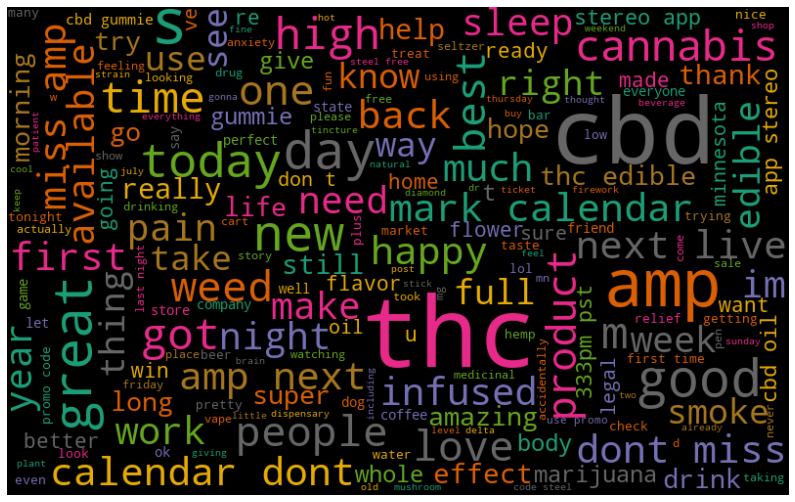

In [51]:
all_words = ' '.join([text for text in tweetDf['TweetCleaned'][tweetDf.analysis == 'Positive']])
generate_wordcloud(all_words)

Common Negative Tweets

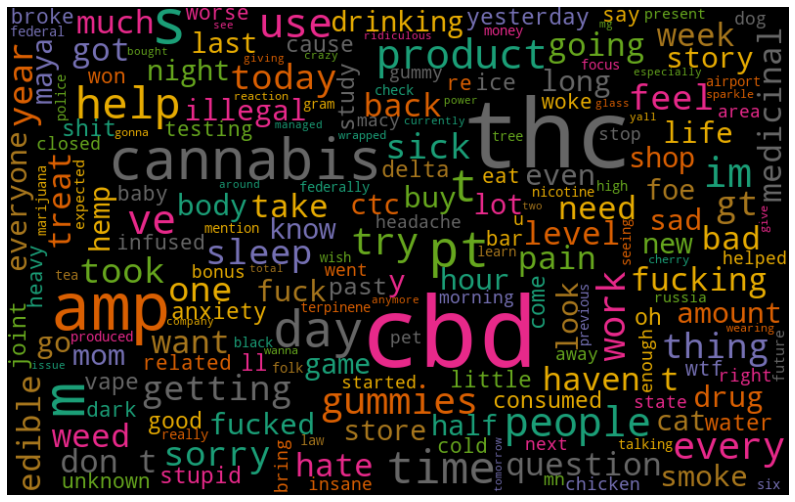

In [52]:
all_words = ' '.join([text for text in tweetDf['TweetCleaned'][tweetDf.analysis == 'Negative']])
generate_wordcloud(all_words)

Common Neutral Tweets

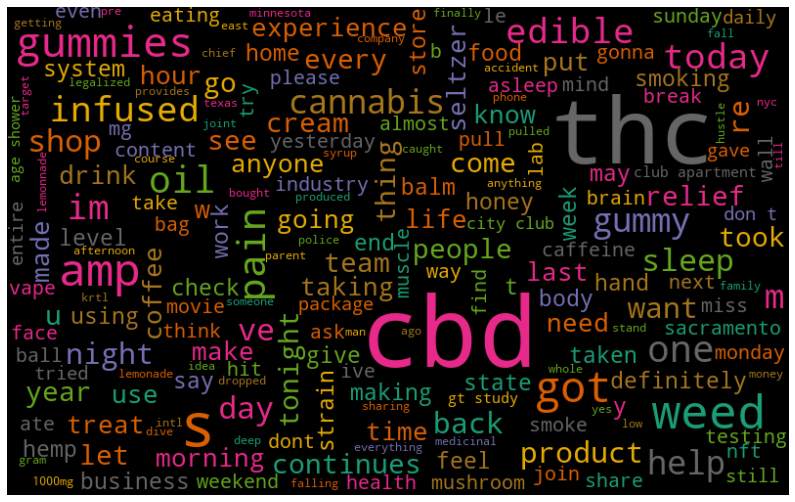

In [53]:
all_words = ' '.join([text for text in tweetDf['TweetCleaned'][tweetDf.analysis == 'Neutral']])
generate_wordcloud(all_words)

# Network Analysis on medicinal marijuana

In [54]:
usernameHashtagAndLikes = list(zip(tweetDf['User'], tweetDf['Hashtags'], tweetDf['like Count']))

username = []
hashtag = []
likes=[]
for i,j,k in usernameHashtagAndLikes:
    if j != 'no hashtags':
        
        for a in ast.literal_eval(j):
            username.append(i)
            hashtag.append(a)
            likes.append(k)
nodesAfter = zip(username,hashtag,likes)

In [55]:
zippedAfter = list(zip(username, hashtag,likes))
nodesAfter = pd.DataFrame(zippedAfter, columns=['username', 'hashtag','likes'])

In [56]:
df3 = nodesAfter['hashtag'].value_counts().iloc[:10].rename_axis('val').reset_index(name='count')

In [57]:
topTenAfter = df3['val'].values.tolist()

In [58]:
topTenValuesAfter = []
for i,j,k in zippedAfter:
    if j in topTenAfter:
        topTenValuesAfter.append((i,j,k))

In [59]:
nodesTenAfter = pd.DataFrame(topTenValuesAfter, columns=['username', 'hashtag','likes'])

In [60]:
nodesTenAfter['hashtag'].unique()

array(['cannabis', 'hemp', 'marijuana', 'mmemberville',
       'cannabiscommunity', 'thctribe', 'neocodesociety', 'thc',
       'tribeofhigherconsciousness', 'cbd'], dtype=object)

In [61]:
G = nx.Graph()
G = nx.from_pandas_edgelist(nodesTenAfter,'hashtag','username',edge_attr =True)
edgeListAfter = nx.to_edgelist(G)

In [62]:
colorsAfter =[]

for node in G:
    
    if node in nodesTenAfter['username'].values:
        colorsAfter.append("red")
    else:
        colorsAfter.append("yellow")

Below graph shows the community of cbd which has the most nodes, attached to it

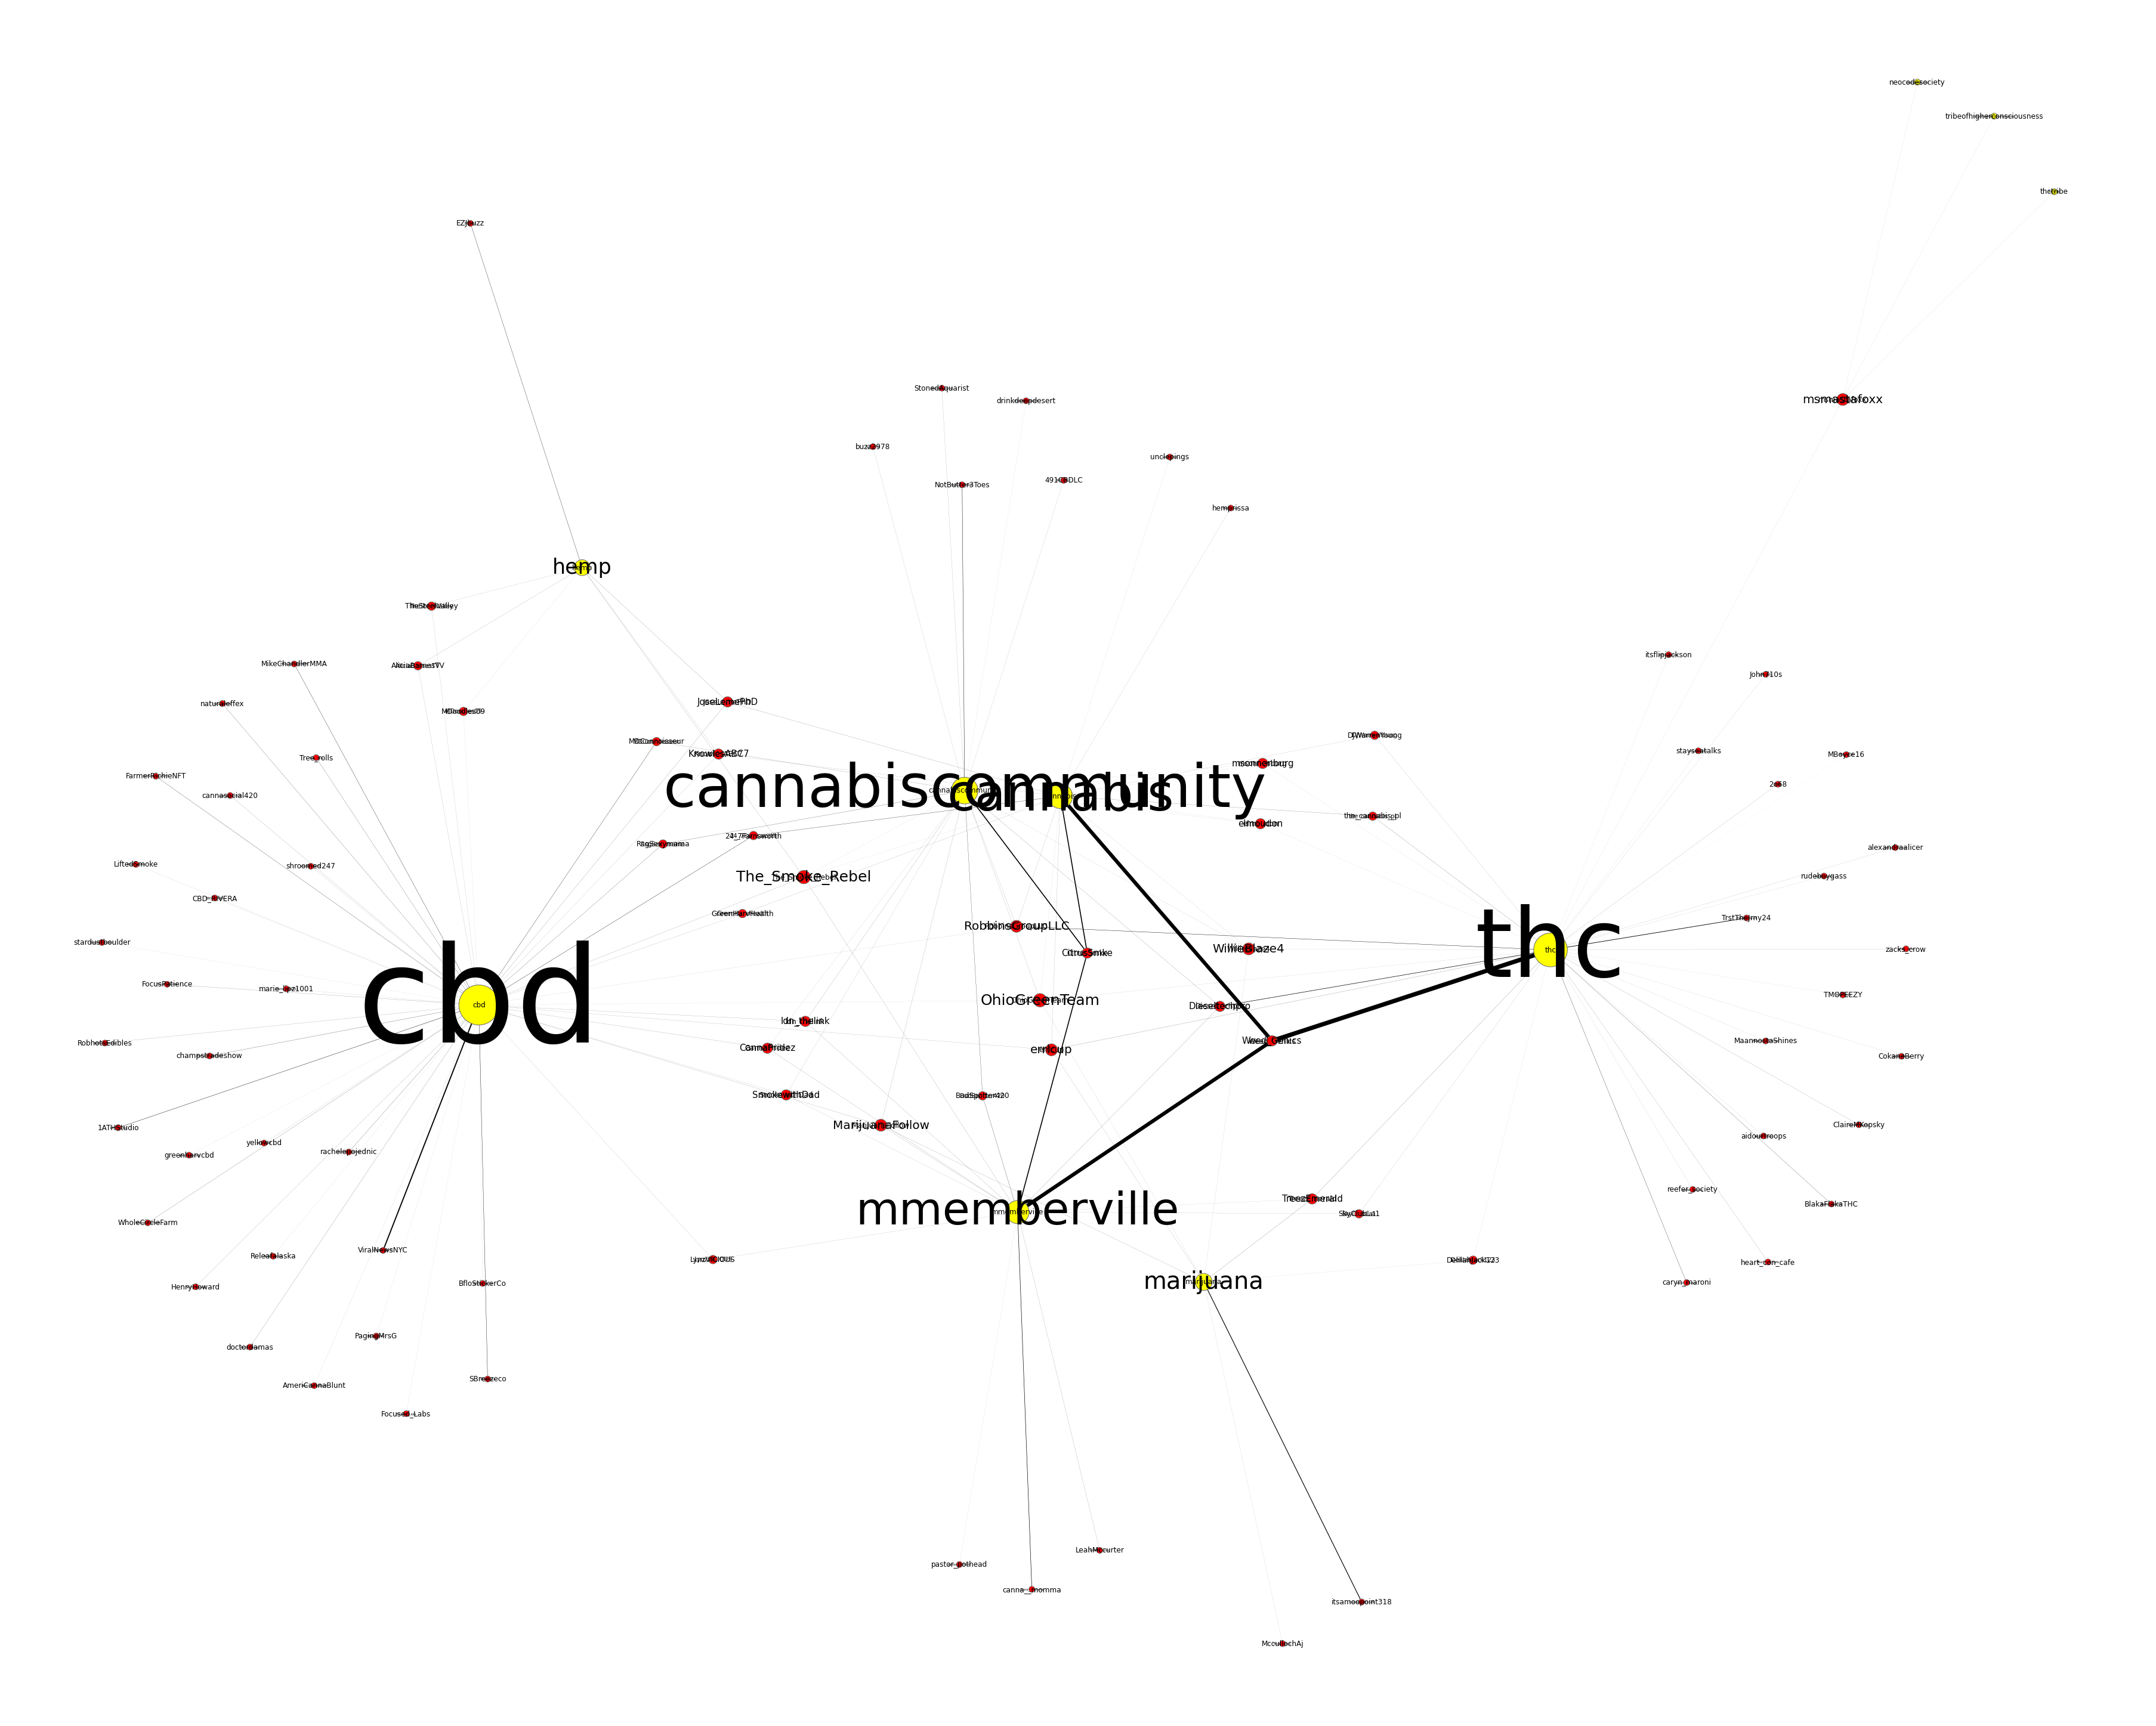

In [63]:
d= dict(G.degree)
pos = nx.spring_layout(G)
plt.figure(figsize=(50,40))
nx.draw(G, pos=pos,with_labels =True, node_color = colorsAfter,
        node_size = [ v * 100 for v in dict(G.degree()).values()]
       ,width =[v[2]['likes']/50 for v in edgeListAfter])
for node,(x,y) in pos.items():
    text(x,y,node,fontsize= d[node]*5, ha='center', va='center')

ax = plt.gca()
ax.collections[0].set_edgecolor("#696969")
plt.savefig("fig2.jpg", dpi=100)

Eigen Centrality

In [64]:
for node in G.nodes():
    print(node, nx.eigenvector_centrality(G, max_iter=1000)[node])

cannabis 0.22810469216067097
JoseLemePhD 0.11079261063944537
hemp 0.08450944389512409
RobbinsGroupLLC 0.1655996603458626
marijuana 0.09275501856081803
itsamoopoint318 0.012224483637469249
mmemberville 0.167684143126523
CitrusSmke 0.08560083106242508
cannabiscommunity 0.2537209103968938
thctribe 0.004519540751667194
msmastafoxx 0.03429307810935105
neocodesociety 0.004519540751667194
thc 0.24664373331094674
tribeofhigherconsciousness 0.004519540751667194
WillieBlaze4 0.10823185498900349
John710s 0.03250612467583871
SkyClubLa1 0.05460570906256828
rudeboygass 0.03250612467583871
DJWarrenYoung 0.06256874497088806
canna__momma 0.02209958438672956
Weed_Genics 0.08466832935761762
itsflipjackson 0.03250612467583871
DelilahJack123 0.04473060831330797
elmoudon 0.09600737135153424
msonnenburg 0.09600737135153424
StonedAquarist 0.03343862638064618
BudSpotter420 0.055538210767375744
hemprissa 0.030062620295049337
drinkdeepdesert 0.03343862638064618
the_cannabis_pl 0.06256874497088806
BlakaFlakaTHC 0

In [65]:
print('Global clustering coefficient = {}'.format(nx.transitivity(G)))

Global clustering coefficient = 0


In [66]:
print(list(nx.bridges(G.to_undirected())))

[('cannabis', 'hemprissa'), ('cannabis', 'unclepings'), ('hemp', 'EZJbuzz'), ('marijuana', 'itsamoopoint318'), ('marijuana', 'MccullochAj'), ('mmemberville', 'canna__momma'), ('mmemberville', 'pastor_pothead'), ('mmemberville', 'LeahMccurter'), ('cannabiscommunity', 'StonedAquarist'), ('cannabiscommunity', 'drinkdeepdesert'), ('cannabiscommunity', 'NotButter3Toes'), ('cannabiscommunity', '491CBDLC'), ('cannabiscommunity', 'buzz2978'), ('thctribe', 'msmastafoxx'), ('msmastafoxx', 'neocodesociety'), ('msmastafoxx', 'thc'), ('msmastafoxx', 'tribeofhigherconsciousness'), ('thc', 'John710s'), ('thc', 'rudeboygass'), ('thc', 'itsflipjackson'), ('thc', 'BlakaFlakaTHC'), ('thc', 'alexandraalicer'), ('thc', 'stayseatalks'), ('thc', 'TMOPEEZY'), ('thc', 'MaannostaShines'), ('thc', '2o68'), ('thc', 'CokaneBerry'), ('thc', 'aidourtroops'), ('thc', 'ClaireMKopsky'), ('thc', 'reefer_society'), ('thc', 'TrstTheJrny24'), ('thc', 'MBoyce16'), ('thc', 'zacks_crow'), ('thc', 'heart_con_cafe'), ('thc', 'c